# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [19]:
pip install PalmerPenguins

In [20]:
# Code Here
from palmerpenguins import load_penguins
import pandas as pd
penguins = load_penguins()
penguins_dummies = pd.get_dummies(penguins, drop_first = False)
penguins_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [21]:
# Code Here
# remove any na
penguins_clean = penguins_dummies.dropna()
penguins_clean = penguins_clean.applymap(lambda x: 1 if x is True else (0 if x is False else x))


# define predictors and target
X = penguins_clean.drop(columns = 'bill_depth_mm')
y = penguins_clean['bill_depth_mm']

/tmp/ipython-input-731351649.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  penguins_clean = penguins_clean.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(
    X=X_train[['island_Dream','island_Biscoe', 'sex_male']],
    y=y_train
)

model2 = LinearRegression()
model2.fit(
    X=X_train[['island_Dream','island_Biscoe', 'sex_male', 'flipper_length_mm']],
    y=y_train
)

model3 = LinearRegression()
model3.fit(
    X=X_train[['sex_male', 'flipper_length_mm', 'body_mass_g']],
    y=y_train
)

model4 = LinearRegression()
model4.fit(
    X=X_train[['island_Dream','island_Biscoe', 'sex_male', 'flipper_length_mm', 'body_mass_g']],
    y=y_train
)

LinearRegression()

In [24]:
# test models
y_test_1 = model1.predict(X_test[['island_Dream','island_Biscoe','sex_male']])
y_test_2 = model2.predict(X_test[['island_Dream','island_Biscoe', 'sex_male', 'flipper_length_mm']])
y_test_3 = model3.predict(X_test[['sex_male', 'flipper_length_mm', 'body_mass_g']])
y_test_4 = model4.predict(X_test[['island_Dream','island_Biscoe', 'sex_male', 'flipper_length_mm', 'body_mass_g']])



In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse_1 = mean_squared_error(y_test, y_test_1)
mse_2 = mean_squared_error(y_test, y_test_2)
mse_3 = mean_squared_error(y_test, y_test_3)
mse_4 = mean_squared_error(y_test, y_test_4)

rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)
rmse_3 = np.sqrt(mse_3)
rmse_4 = np.sqrt(mse_4)

rmse_1, rmse_2, rmse_3, rmse_4



(np.float64(1.4677106477655395),
 np.float64(1.1823226373224989),
 np.float64(1.1519082680297545),
 np.float64(1.1648621050415309))

In [27]:
X_test_copy = X_test.copy()
X_test_copy['Model1_Pred'] = y_test_1
X_test_copy['Model2_Pred'] = y_test_2
X_test_copy['Model3_Pred'] = y_test_3
X_test_copy['Model4_Pred'] = y_test_4


X_test_copy.head()


,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,Model1_Pred,Model2_Pred,Model3_Pred,Model4_Pred
93,39.6,186.0,4450.0,2008,1,0,0,0,1,0,0,1,19.126471,19.853850,19.019828,19.478032
61,41.3,195.0,4400.0,2008,1,0,0,1,0,0,0,1,16.549387,17.807323,18.566867,17.772651
327,51.4,201.0,3950.0,2009,0,1,0,0,1,0,0,1,19.126471,18.848284,18.657151,18.964216
138,37.0,185.0,3400.0,2009,1,0,0,0,1,0,1,0,17.668039,17.951739,17.558057,17.853226
321,50.8,201.0,4450.0,2009,0,1,0,0,1,0,0,1,19.126471,18.848284,18.186442,18.741764


In [28]:

# Get train predictions
y_train_1 = model1.predict(X_train[['island_Dream','island_Biscoe','sex_male']])
y_train_2 = model2.predict(X_train[['island_Dream','island_Biscoe','sex_male','flipper_length_mm']])
y_train_3 = model3.predict(X_train[['sex_male','flipper_length_mm','body_mass_g']])
y_train_4 = model4.predict(X_train[['island_Dream','island_Biscoe','sex_male','flipper_length_mm','body_mass_g']])

# Compute training RMSEs
train_rmse_1 = np.sqrt(mean_squared_error(y_train, y_train_1))
train_rmse_2 = np.sqrt(mean_squared_error(y_train, y_train_2))
train_rmse_3 = np.sqrt(mean_squared_error(y_train, y_train_3))
train_rmse_4 = np.sqrt(mean_squared_error(y_train, y_train_4))


In [29]:
rmse_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Train_RMSE': [train_rmse_1, train_rmse_2, train_rmse_3, train_rmse_4],
    'Test_RMSE': [rmse_1, rmse_2, rmse_3, rmse_4]
})

rmse_table

,Model,Train_RMSE,Test_RMSE
0,Model 1,1.288709,1.467711
1,Model 2,1.074182,1.182323
2,Model 3,1.165342,1.151908
3,Model 4,1.064029,1.164862


In [30]:
rmse_long = rmse_table.melt(id_vars='Model', var_name='Type', value_name='RMSE')
rmse_long


,Model,Type,RMSE
0,Model 1,Train_RMSE,1.288709
1,Model 2,Train_RMSE,1.074182
2,Model 3,Train_RMSE,1.165342
3,Model 4,Train_RMSE,1.064029
4,Model 1,Test_RMSE,1.467711
5,Model 2,Test_RMSE,1.182323
6,Model 3,Test_RMSE,1.151908
7,Model 4,Test_RMSE,1.164862


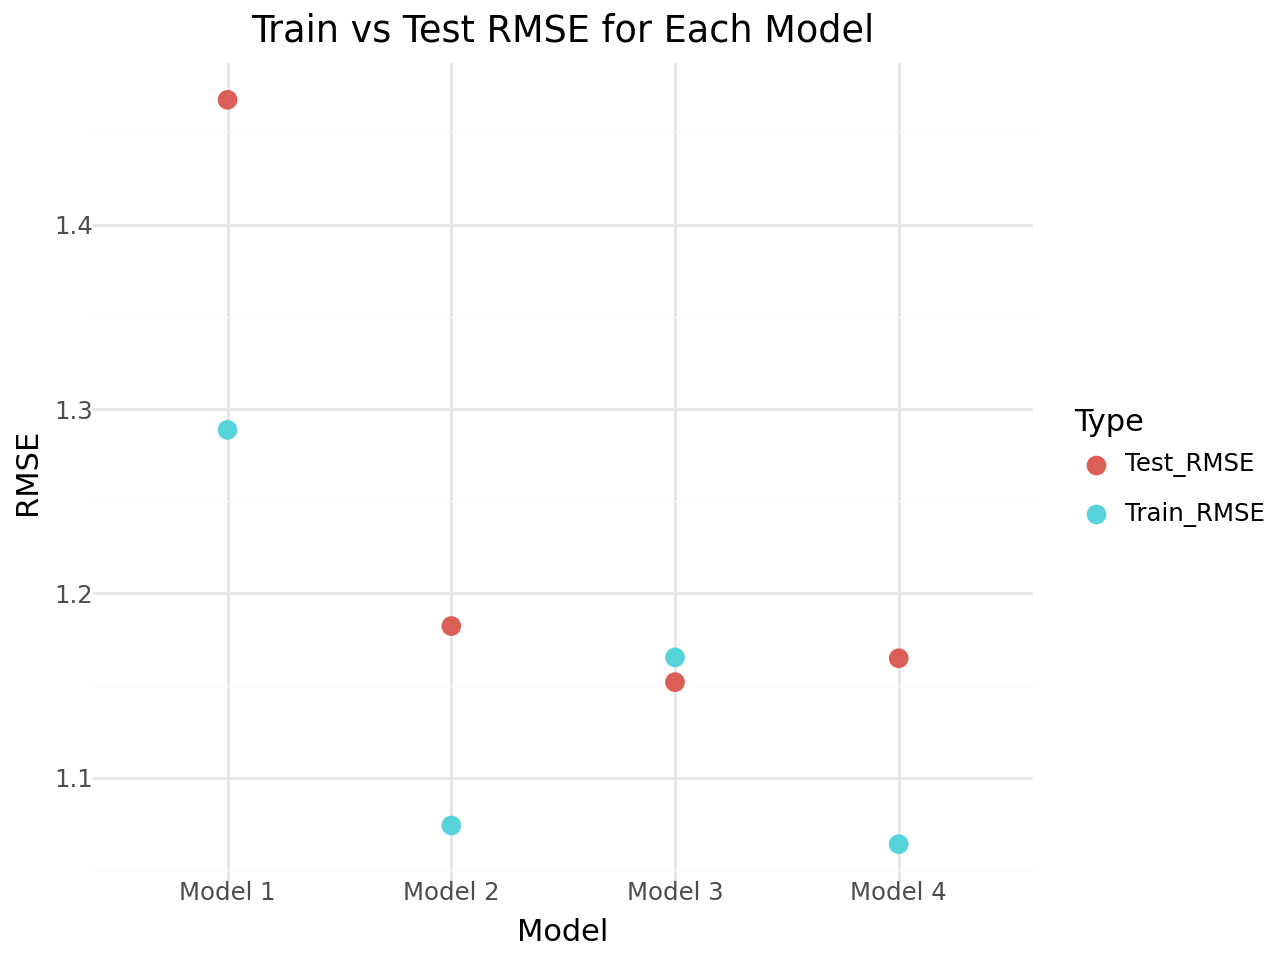

In [31]:
from plotnine import *

(
    ggplot(rmse_long, aes(x='Model', y='RMSE', color='Type'))
    + geom_point(size=3)
    + theme_minimal()
    + labs(title='Train vs Test RMSE for Each Model')
)
